In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [ ]:
f1=pd.read_excel('/content/7-District-wise-Cyber-Crime - 2018.xlsx',header=(5))
f2=pd.read_excel('/content/7-District-wise-Cyber-Crime - 2019.xlsx',header=(5))
f3=pd.read_excel('/content/Districtwise-Cyber-Crimes_2020.xlsx',header=(5))
f4=pd.read_excel('/content/16730068309DistrictwiseCyberCrimes2021.xlsx',header=(5))
f5=pd.read_excel('/content/17016864879DistrictwiseCyberCrimes2022.xlsx',header=(5))

f1['year']=2018
f2['year']=2019
f3['year']=2020
f4['year']=2021
f5['year']=2022

result_df = pd.concat([f1, f2, f3, f4, f5])
result_df = result_df.reset_index(drop=True)

In [ ]:
result_df

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,State : Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,1,Anantapur,0.0,9.0,1.0,0.0,1.0,1.0,3.0,4.0,...,15.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,2018
3,2,Chittoor,0.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2018
4,3,Cuddapah,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
4956,State: Puducherry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
4957,1,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
4958,2,Puducherry,0.0,56.0,1.0,0.0,1.0,3.0,27.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,2022


In [ ]:
States = (result_df[result_df[1].str.isalpha()==False][1]).str.split(':').str[1].str.strip()
new_index = range(States.index.min(), len(result_df))
States = States.reindex(new_index)
States = States.fillna(method='ffill')
result_df[1]=States

In [ ]:
result_df

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,Andhra Pradesh,Anantapur,0.0,9.0,1.0,0.0,1.0,1.0,3.0,4.0,...,15.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,2018
3,Andhra Pradesh,Chittoor,0.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2018
4,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
4956,Puducherry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
4957,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
4958,Puducherry,Puducherry,0.0,56.0,1.0,0.0,1.0,3.0,27.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,2022


In [ ]:
result_df[result_df[2]=='Total']

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,year
22,Andhra Pradesh,Total,7.0,344.0,10.0,0.0,10.0,25.0,276.0,26.0,...,164.0,789.0,1.0,0.0,0.0,0.0,0.0,1.0,1207.0,2018
48,Arunachal Pradesh,Total,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2018
90,Assam,Total,0.0,823.0,172.0,0.0,172.0,4.0,103.0,516.0,...,144.0,386.0,0.0,0.0,19.0,0.0,0.0,19.0,2022.0,2018
138,Bihar,Total,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,370.0,0.0,0.0,0.0,0.0,0.0,0.0,374.0,2018
168,Chhattisgarh,Total,0.0,18.0,4.0,0.0,4.0,2.0,6.0,6.0,...,20.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,D&N Haveli,Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
1844,Daman & Diu,Total,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2019
1869,Delhi UT,Total,0.0,37.0,4.0,0.0,4.0,8.0,11.0,11.0,...,14.0,59.0,4.0,0.0,0.0,0.0,0.0,4.0,115.0,2019
1872,Lakshadweep,Total,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2019


In [ ]:
drop_index1 =result_df[(result_df[2]== 'Total Districts ')|((result_df[2]== 'Total'))][2].index.tolist()
drop_index2 = result_df[result_df[4].isna()].index.tolist()
dr = drop_index1+drop_index2
dr.sort()
result_df=result_df.drop(dr)

In [ ]:
y=[5,6,7,8,9,10,11,14,15,16,17,18,24,29,30,31,32,33,39,40,44,50,51]
clm=[]
for i in range(3,52):
  if i not in y:
    cnt = result_df[result_df[i]==0][i].count()
    clm.append(i)
  df =result_df[['year',1,2]+clm]
df

,year,1,2,3,4,12,13,19,20,21,...,37,38,41,42,43,45,46,47,48,49
2,2018,Andhra Pradesh,Anantapur,0.0,9.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3,2018,Andhra Pradesh,Chittoor,0.0,4.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018,Andhra Pradesh,East Godavari,0.0,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,2022,Ladakh,Kargil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4949,2022,Ladakh,Leh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4953,2022,Lakshadweep,Lakshadweep,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4957,2022,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,year,1,2,3,4,12,13,19,20,21,...,37,38,41,42,43,45,46,47,48,49
0,2018,Andhra Pradesh,Anantapur,0.0,9.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
1,2018,Andhra Pradesh,Chittoor,0.0,4.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,Andhra Pradesh,East Godavari,0.0,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,2022,Ladakh,Kargil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4467,2022,Ladakh,Leh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4468,2022,Lakshadweep,Lakshadweep,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4469,2022,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns = ['Year','State','District','Tampering computer source documents','Computer Related Offences',
              'Cyber Terrorism', 'Publication/ transmission of obscenes','Monitoring of Information',
              'Unauthorized access to computer system', 'Abetment to Commit Offences','Attempt to Commit Offences',
              'IT act','Abetment of Suicide (Online)','Cyber Stalking/ Bullying of Women/ Children','Data theft',
              'Fraud','Cheating','Forgery','Defamation/ Morphing','Fake Profile','Counterfeiting','Cyber Blackmailing/Threatening',
              'Fake News on Social Media','Offences under IPC','Gambling Act','Lotteries Act','Copy Right Act','Trade Marks Act',
              'Other SLL Crimes']

In [ ]:
df.to_csv('Clean_crime_dataset.csv', index=False)


In [ ]:
df

,Year,State,District,Tampering computer source documents,Computer Related Offences,Cyber Terrorism,Publication/ transmission of obscenes,Monitoring of Information,Unauthorized access to computer system,Abetment to Commit Offences,...,Fake Profile,Counterfeiting,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Gambling Act,Lotteries Act,Copy Right Act,Trade Marks Act,Other SLL Crimes
0,2018,Andhra Pradesh,Anantapur,0.0,9.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
1,2018,Andhra Pradesh,Chittoor,0.0,4.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,Andhra Pradesh,East Godavari,0.0,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,2022,Ladakh,Kargil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4467,2022,Ladakh,Leh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4468,2022,Lakshadweep,Lakshadweep,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4469,2022,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.iloc[:,3:] = (df.iloc[:,3:]!=0).replace({True: 1, False: 0})
df_100 = (df.iloc[:,3:].sum()<100)
clm1 = [key for key, value in df_100.items() if value]
clm1

,Year,State,District,Tampering computer source documents,Computer Related Offences,Cyber Terrorism,Publication/ transmission of obscenes,Monitoring of Information,Unauthorized access to computer system,Abetment to Commit Offences,...,Fake Profile,Counterfeiting,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Gambling Act,Lotteries Act,Copy Right Act,Trade Marks Act,Other SLL Crimes
0,2018,Andhra Pradesh,Anantapur,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2018,Andhra Pradesh,Chittoor,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,Andhra Pradesh,East Godavari,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,2022,Ladakh,Kargil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4467,2022,Ladakh,Leh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4468,2022,Lakshadweep,Lakshadweep,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4469,2022,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_100 = (df.iloc[:,3:].sum()<100)
clm1 = [key for key, value in df_100.items() if value]
clm1

['Cyber Terrorism',
 'Monitoring of Information',
 'Unauthorized access to computer system',
 'Abetment to Commit Offences',
 'Attempt to Commit Offences',
 'Abetment of Suicide (Online)',
 'Defamation/ Morphing',
 'Counterfeiting',
 'Gambling Act',
 'Lotteries Act',
 'Copy Right Act',
 'Trade Marks Act']

In [ ]:
df.drop(clm1,axis=1,inplace =True)
df.columns

<ipython-input-17-215a0ddb8eb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(clm1,axis=1,inplace =True)


In [ ]:
df.to_csv('crime_dataset.csv', index=False)


In [ ]:

df.drop(clm1,axis=1,inplace =True)
df.columns

Index(['Year', 'State', 'District', 'Tampering computer source documents',
       'Computer Related Offences', 'Publication/ transmission of obscenes',
       'IT act', 'Cyber Stalking/ Bullying of Women/ Children', 'Data theft',
       'Fraud', 'Cheating', 'Forgery', 'Fake Profile',
       'Cyber Blackmailing/Threatening', 'Fake News on Social Media',
       'Offences under IPC', 'Other SLL Crimes'],
      dtype='object')

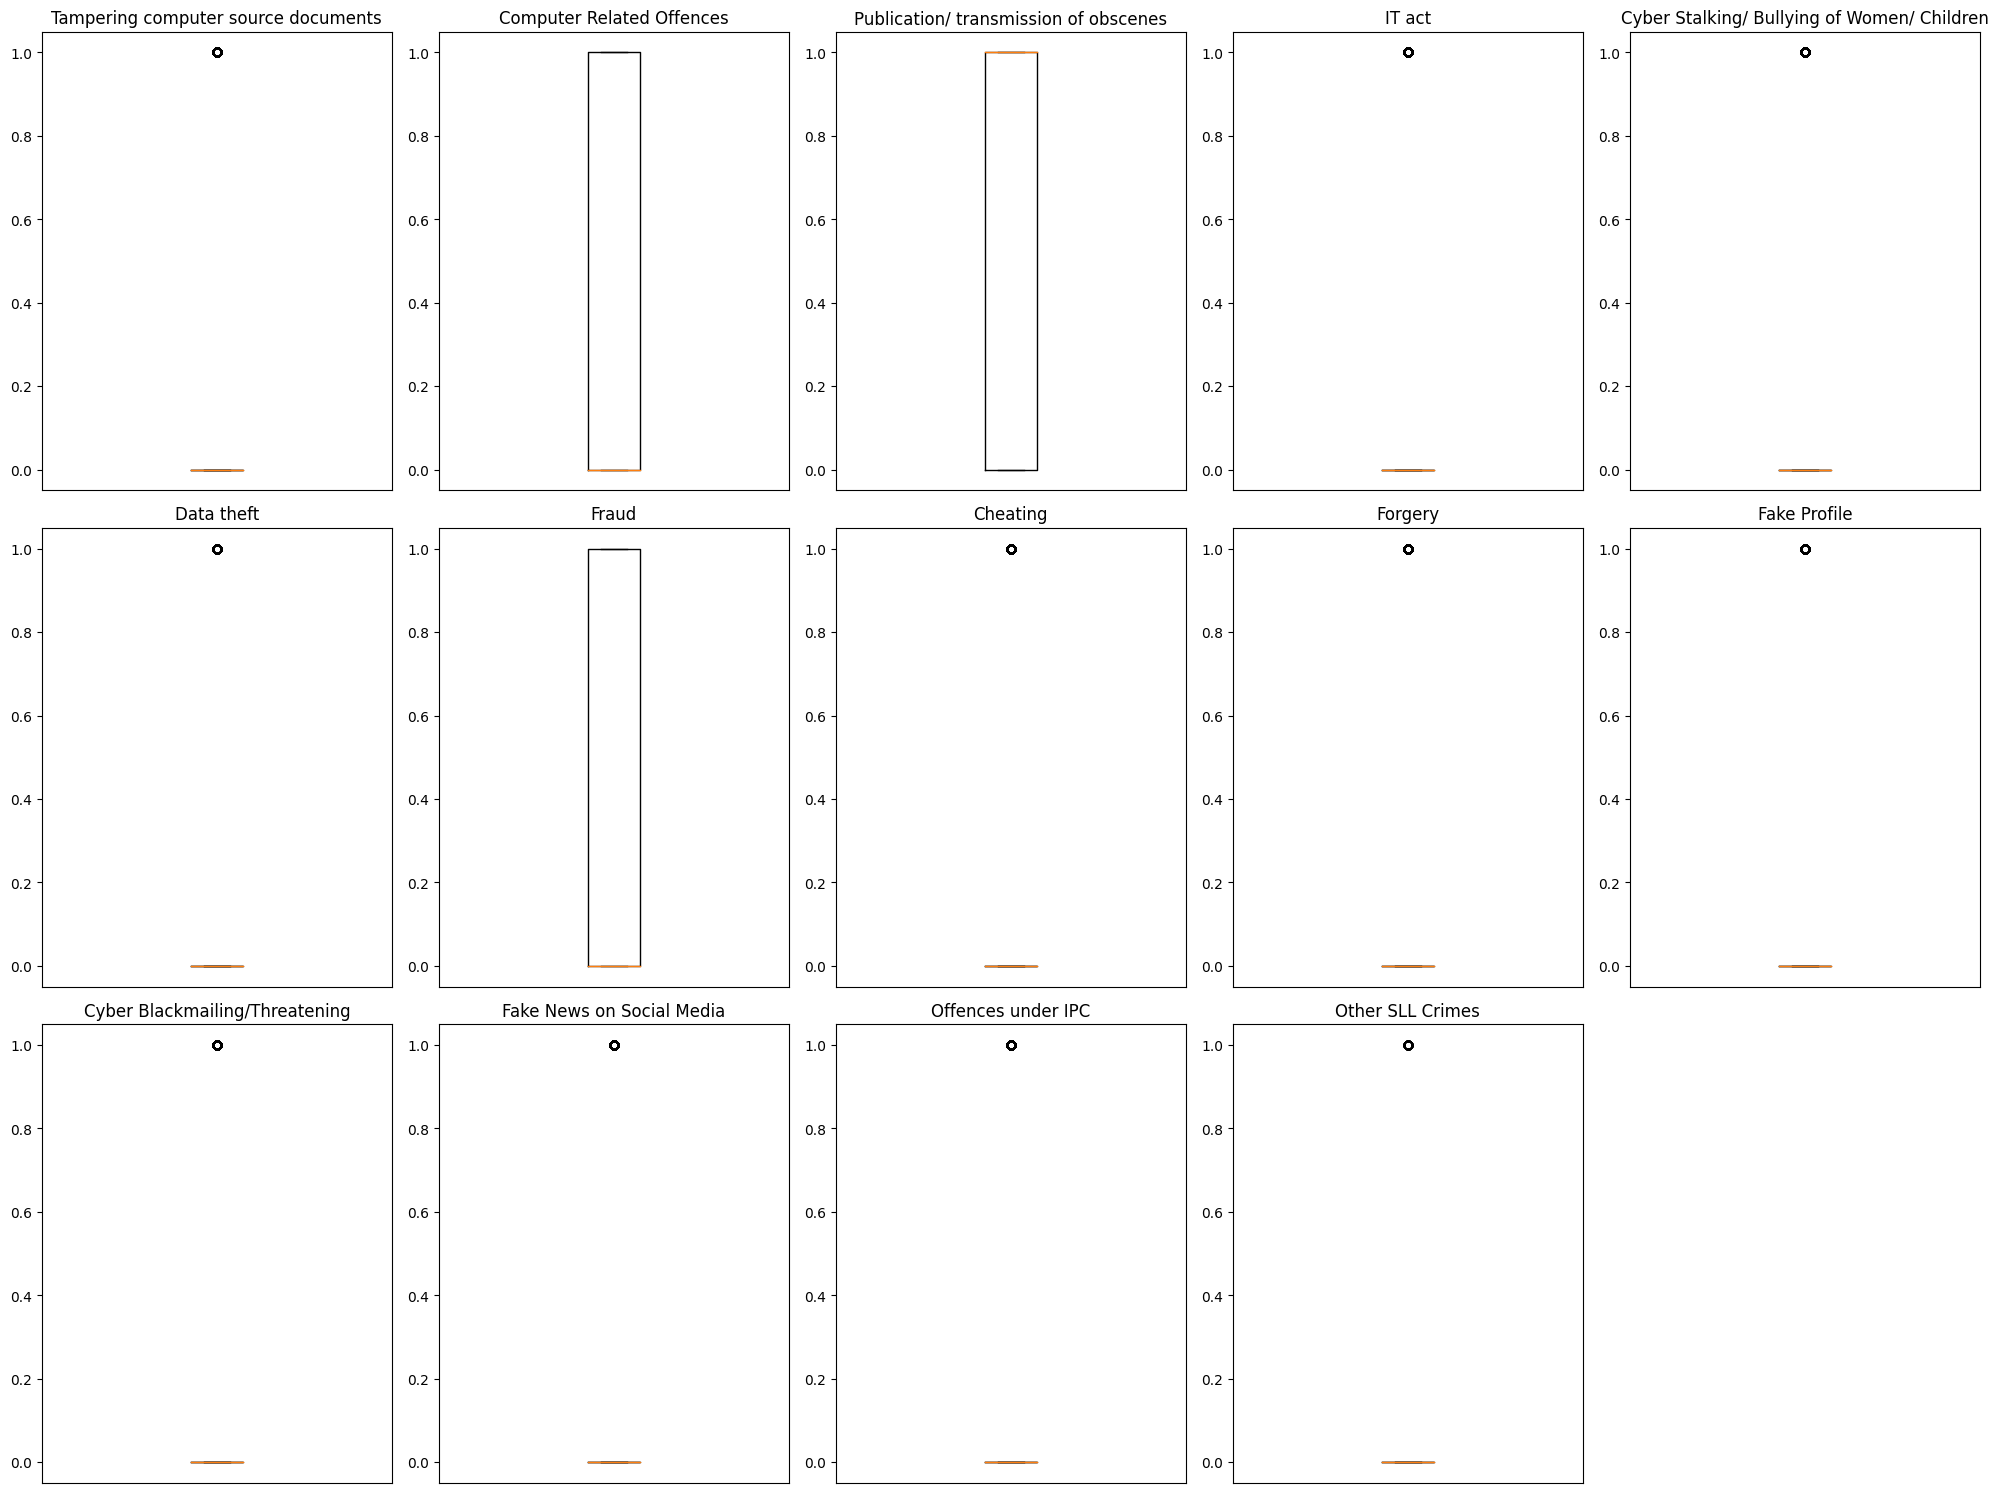

In [ ]:
plt.figure(figsize=(20, 20))

# Loop through each column and create a subplot
for i, col in enumerate(df.columns[3:]):
    plt.subplot(4, 5, i+1)  # 4 rows, 5 columns subplot grid
    plt.boxplot(df[col])
    plt.title(col)
    plt.xticks([])  # Remove x-axis ticks for better visualization

# Adjust layout
plt.tight_layout()
plt.show()

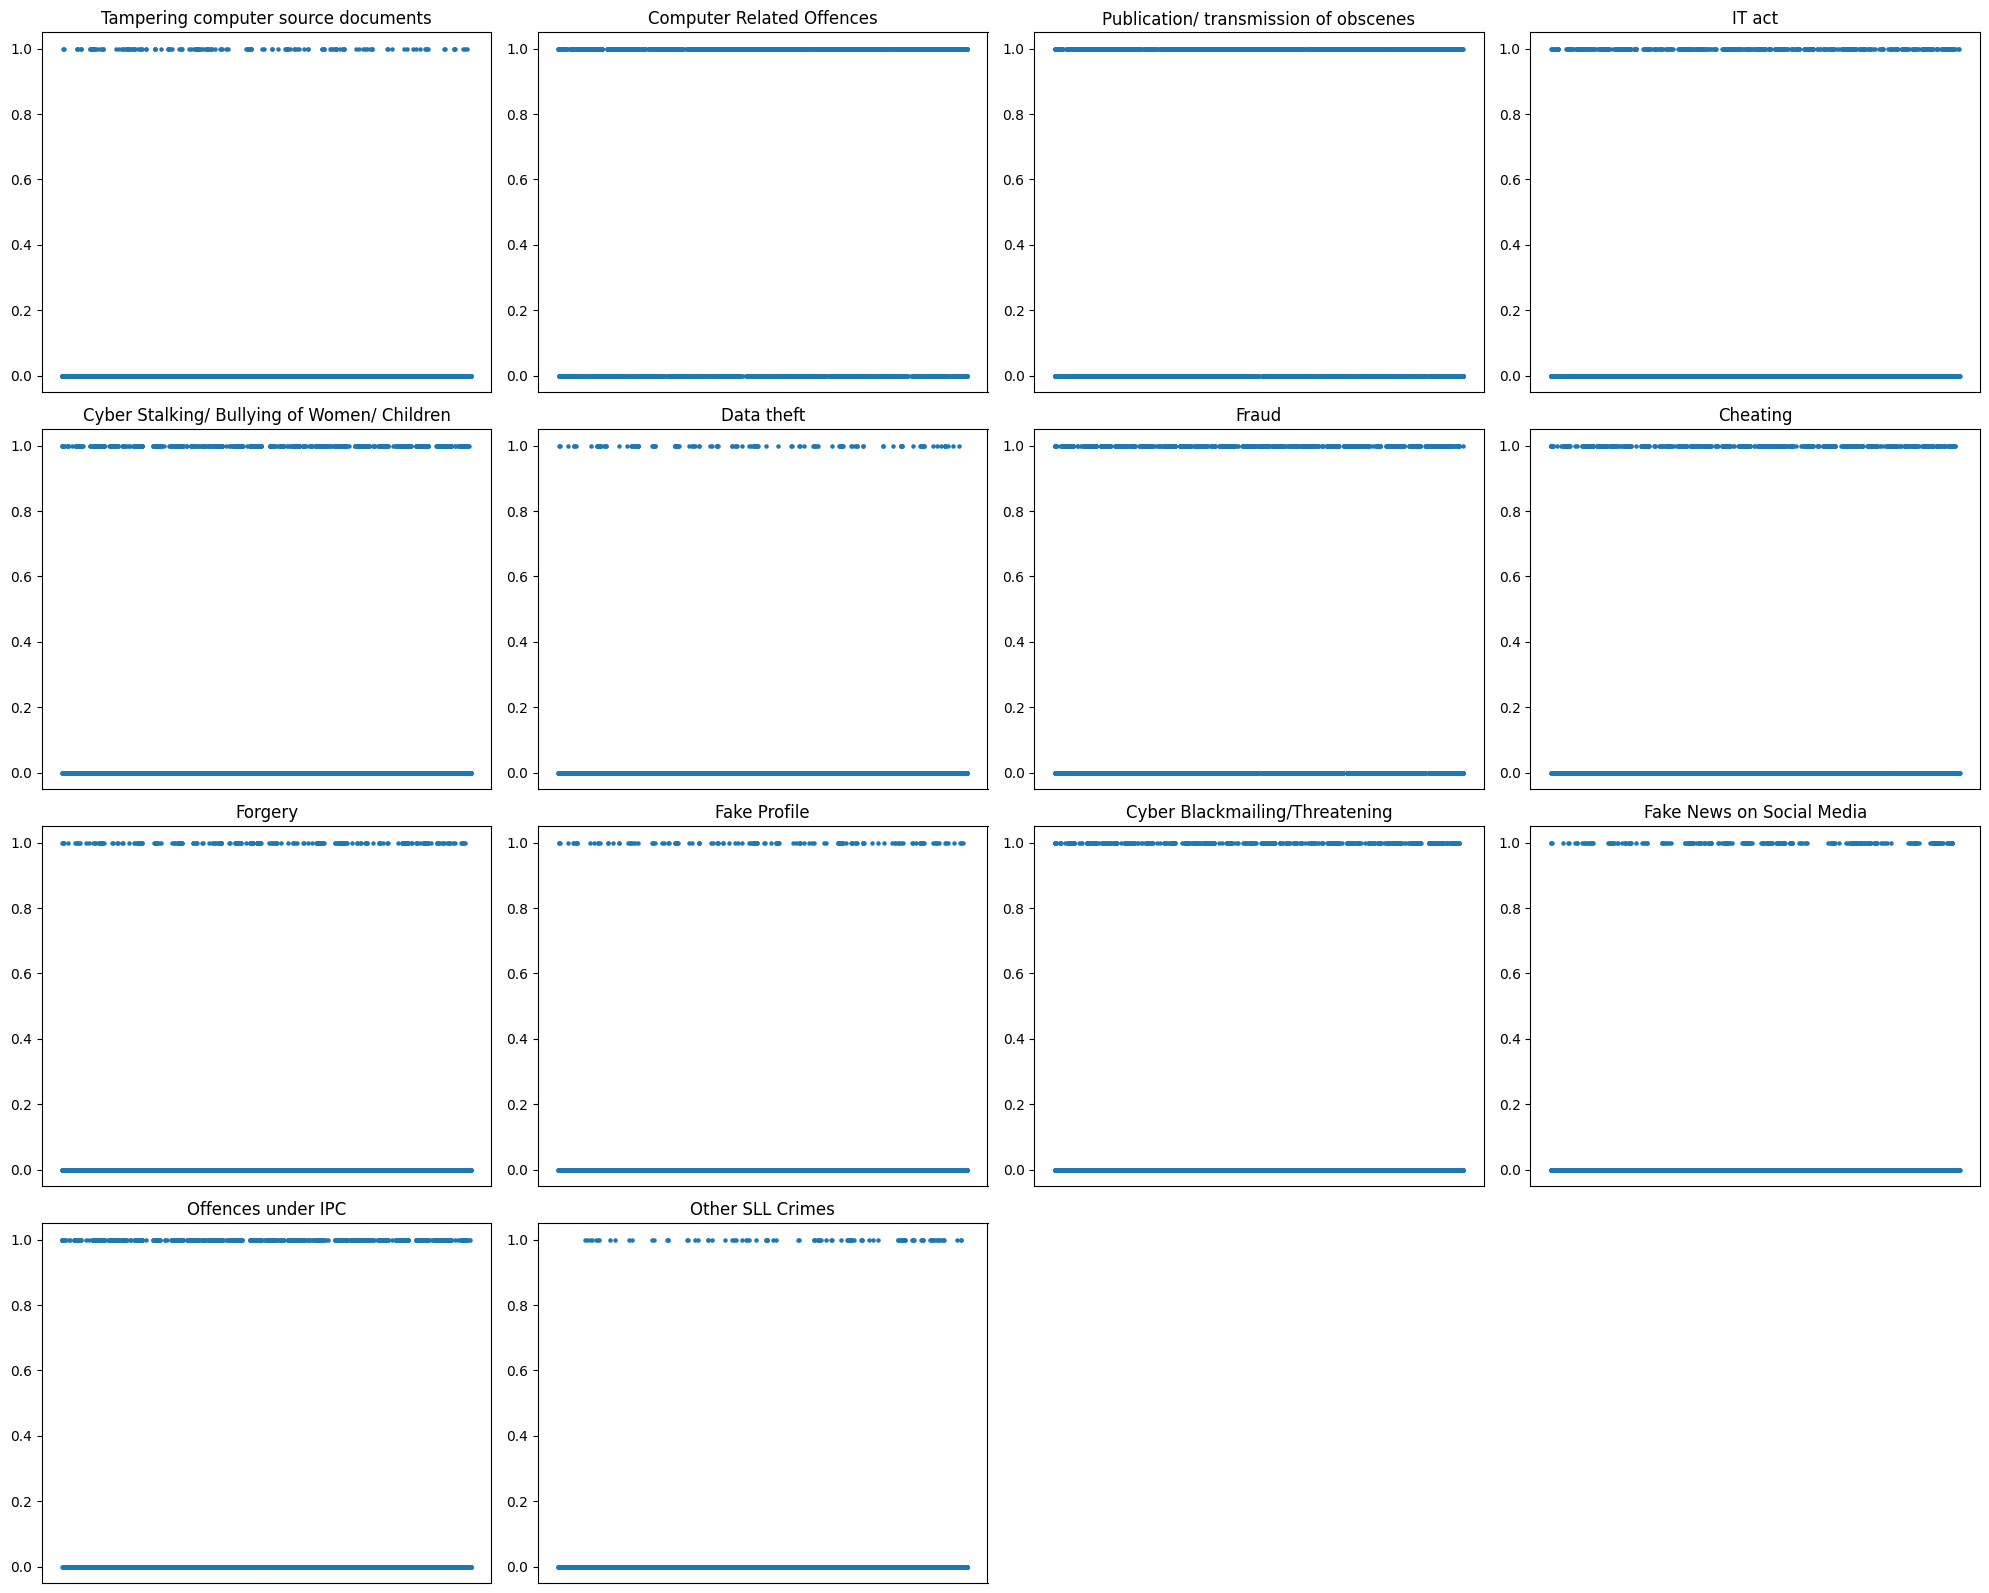

In [ ]:
plt.figure(figsize=(20, 20))

# Loop through each column and create a scatter plot
for i, col in enumerate(df.columns[3:]):
    plt.subplot(5, 4, i+1)  # 5 rows, 4 columns subplot grid
    plt.scatter(range(len(df[col])), df[col], s=5)  # s controls the size of the points
    plt.title(col)
    plt.xticks([])  # Remove x-axis ticks for better visualization

# Adjust layout
plt.tight_layout()

plt.show()

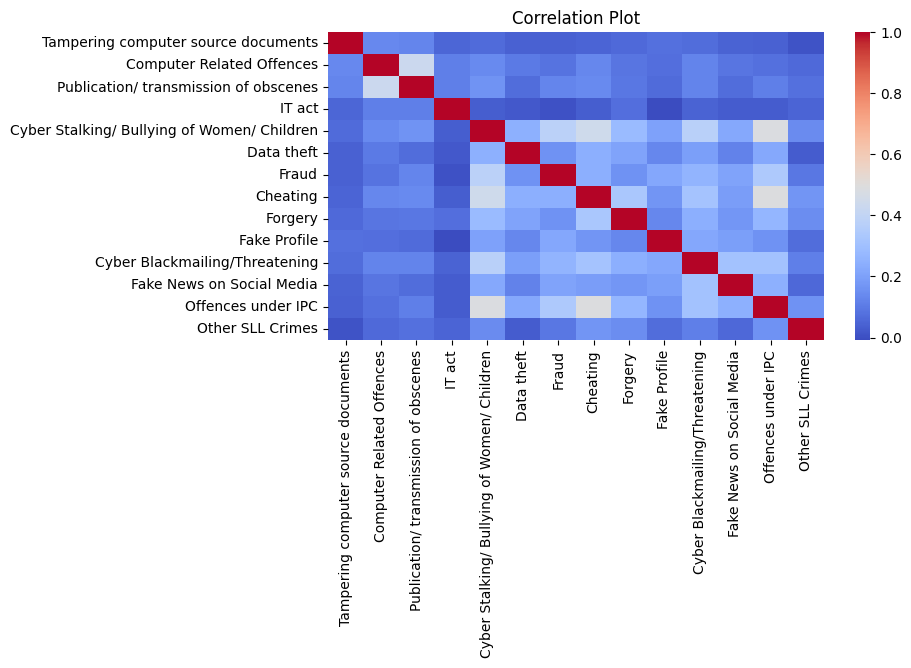

In [ ]:
corr_df = df.iloc[:,3:].corr()
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
sns.heatmap(corr_df, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

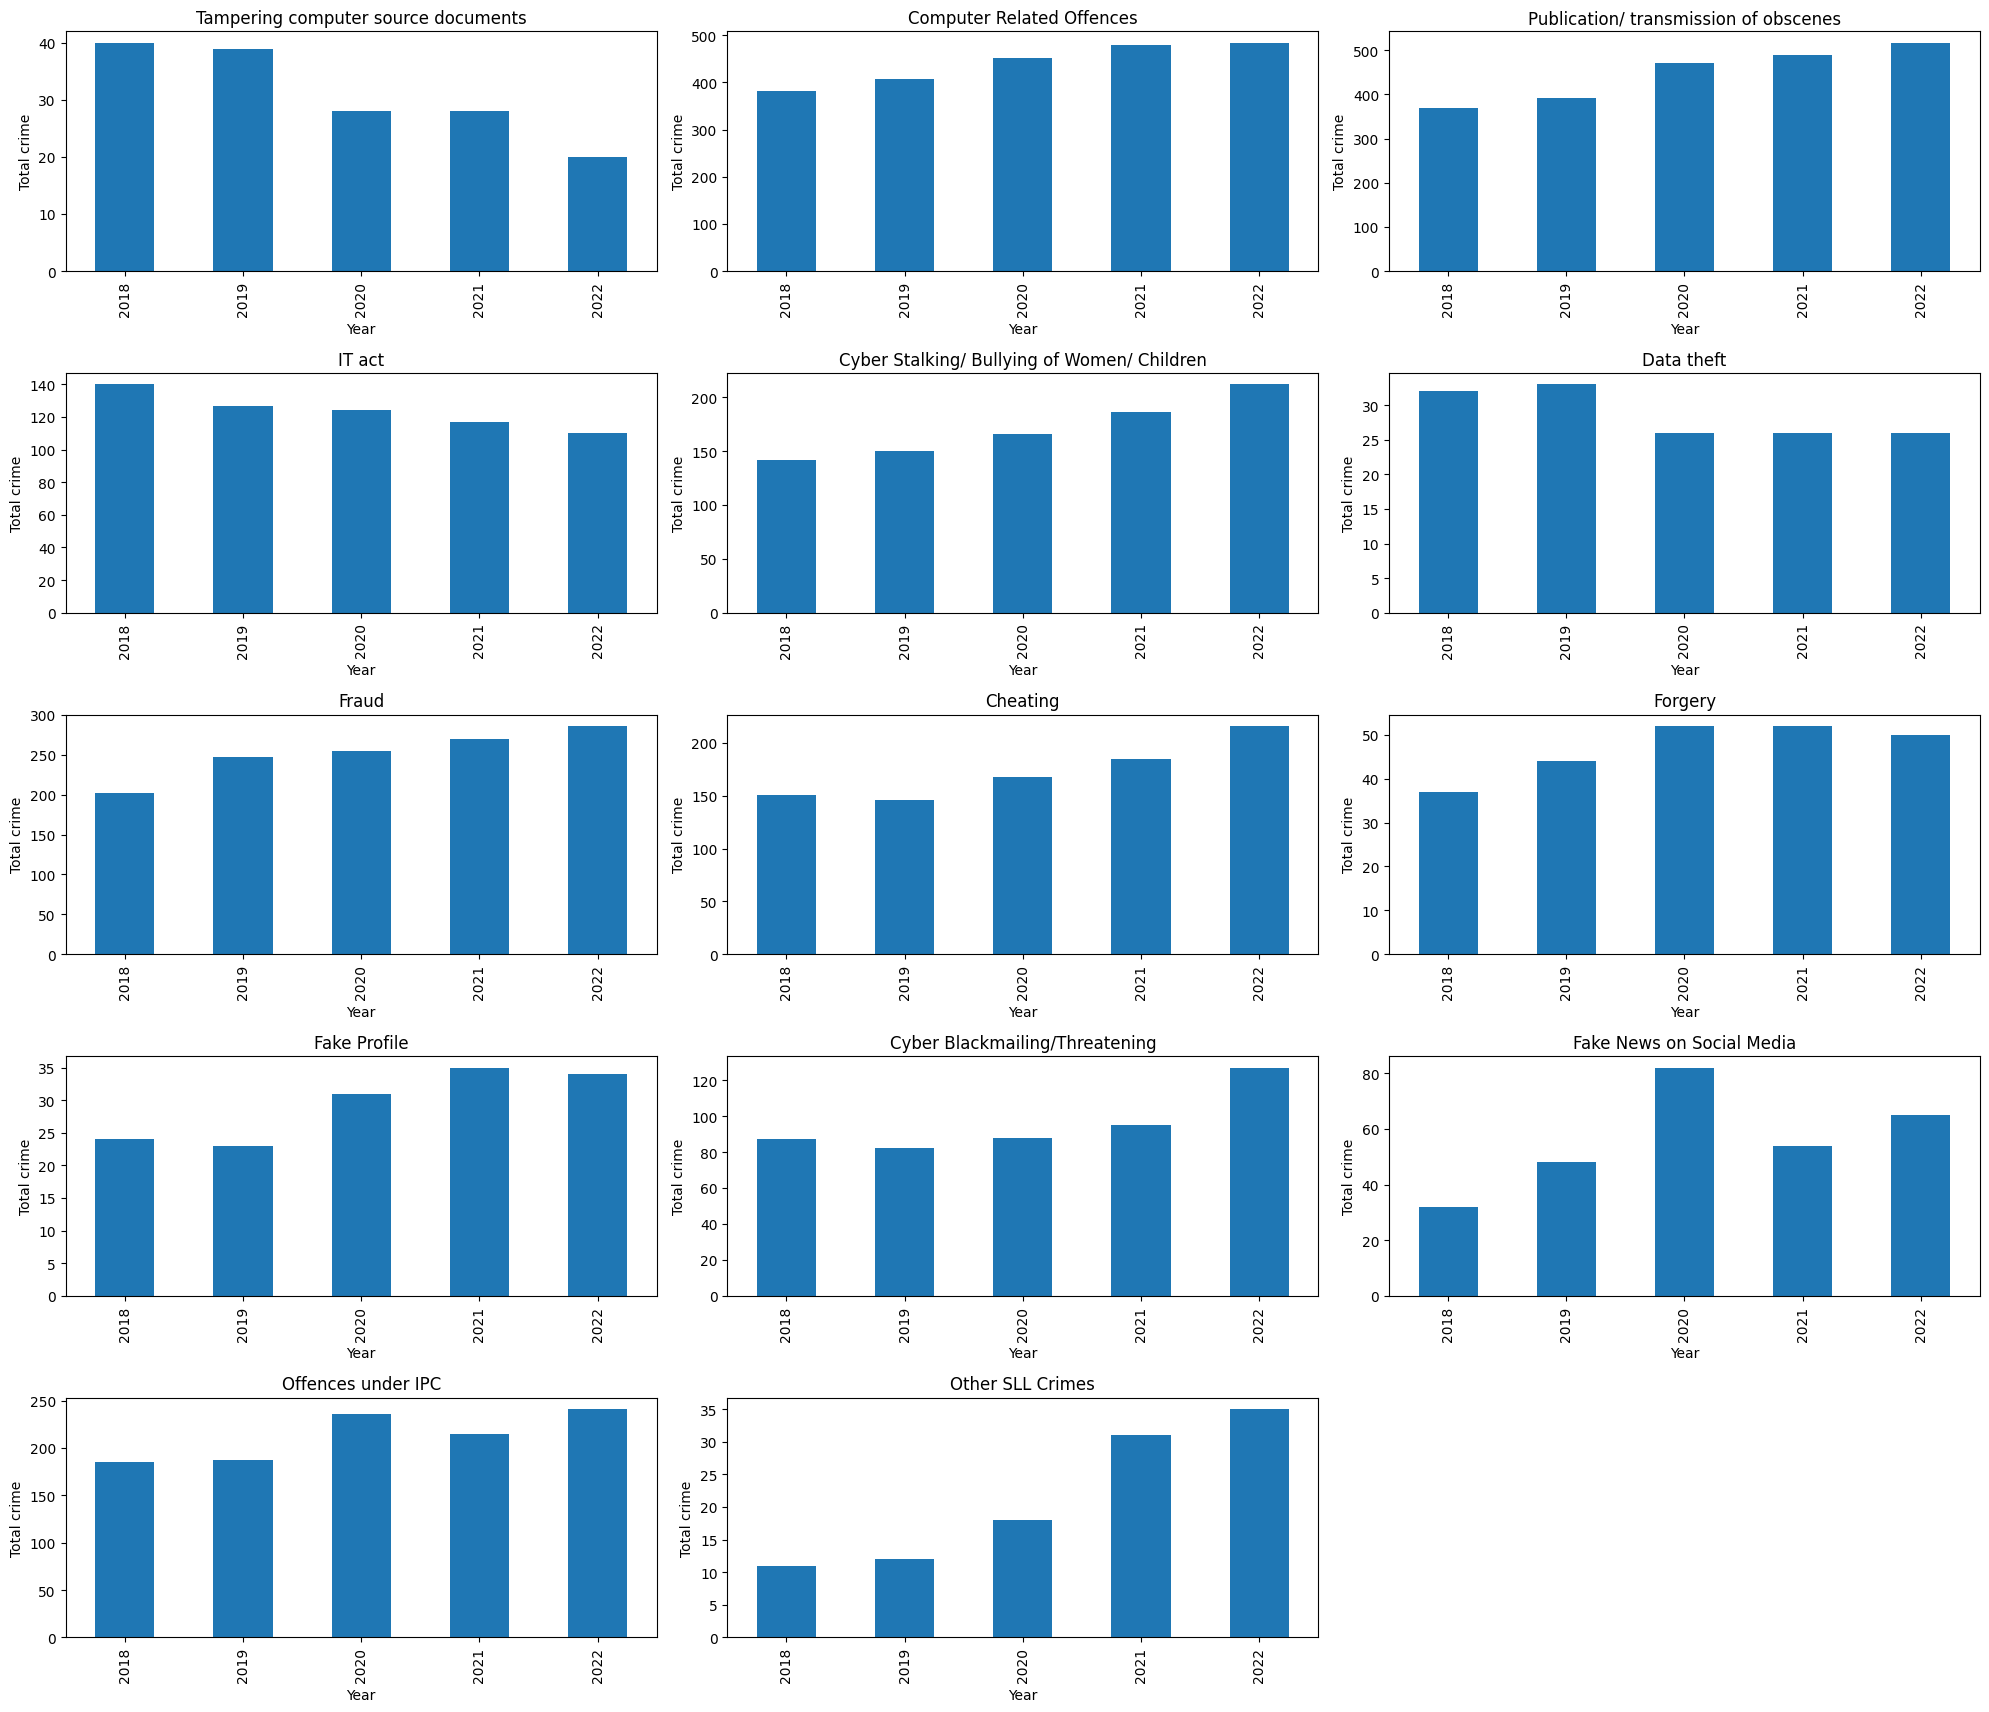

In [ ]:
ax = df.groupby('Year').sum()

# Define the number of rows and columns for subplots
num_cols = 3 # Adjust this as needed
num_rows = (ax.shape[1] - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten axes if necessary
axes = axes.flatten()

# Loop through each category and create a bar plot in the corresponding subplot
for i, col in enumerate(ax.columns[2:]):
    ax[col].plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("Total crime")

# Hide empty subplots
for i in range(len(ax.columns[2:]), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
fx=df.groupby(['Year','State','District']).sum()
fx.idxmax()

Tampering computer source documents            (2018, Andhra Pradesh, Guntur Urban)
Computer Related Offences                        (2018, A&N Islands, South Andaman)
Publication/ transmission of obscenes            (2018, A&N Islands, South Andaman)
IT act                                             (2018, Andhra Pradesh, Cuddapah)
Cyber Stalking/ Bullying of Women/ Children       (2018, Andhra Pradesh, Anantapur)
Data theft                                       (2018, A&N Islands, South Andaman)
Fraud                                            (2018, A&N Islands, South Andaman)
Cheating                                          (2018, Andhra Pradesh, Anantapur)
Forgery                                           (2018, Andhra Pradesh, Anantapur)
Fake Profile                                         (2018, Andhra Pradesh, Guntur)
Cyber Blackmailing/Threatening                    (2018, Andhra Pradesh, Anantapur)
Fake News on Social Media                            (2018, Andhra Pradesh, 

In [ ]:
from shapely.geometry import Polygon
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
india_map=gpd.read_file("Admin2.shp")
gr_df= df.groupby('State').sum()
#deleting those rows which are not required since they have less than 100 crime rate
idx = gr_df[gr_df.iloc[:,2:].sum(axis=1)<5].index
gr_df.drop(idx,inplace=True)

#checking either both dataset have same states or not
correction = {'A&N Islands':'Andaman & Nicobar','D&N Haveli and Daman & Diu':'Dadra and Nagar Haveli and Daman and Diu','Delhi UT':'Delhi'}

gr_df =gr_df.rename(index=correction)

st_map = india_map['ST_NM'].tolist()
st_df = gr_df.index.tolist()

x = [i for i in st_df if i not in st_map]
y = [i for i in st_map if i not in st_df]
x,y

([], ['Ladakh'])

In [ ]:
# creating colums for the x and y coordinates of our geometries and deleting previous geometries
india_map['x'] =india_map.centroid.x
india_map['y'] = india_map.centroid.y
nta_shape_no_geometry = india_map.loc[:, ['ST_NM', 'x', 'y']]

new_df= india_map.merge(gr_df,how='outer', left_on='ST_NM', right_on='State')
new_df.head()

<ipython-input-27-2f4319f2c379>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  india_map['x'] =india_map.centroid.x
<ipython-input-27-2f4319f2c379>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  india_map['y'] = india_map.centroid.y


,ST_NM,geometry,x,y,Year,District,Tampering computer source documents,Computer Related Offences,Publication/ transmission of obscenes,IT act,Cyber Stalking/ Bullying of Women/ Children,Data theft,Fraud,Cheating,Forgery,Fake Profile,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Other SLL Crimes
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477...",94.675149,28.035984,266646.0,AnjawChanglangCrime BranchDibang ValleyKameng ...,0.0,9.0,13.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227...",92.825655,26.354745,408044.0,BIEOBarpetaBaksaBongaigaonCIDCacharChirangDarr...,7.0,105.0,125.0,39.0,8.0,1.0,10.0,7.0,2.0,3.0,13.0,4.0,12.0,0.0
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420...",76.780504,30.729350,10100.0,ChandigarhChandigarhChandigarhChandigarhChandi...,0.0,5.0,4.0,0.0,5.0,1.0,2.0,5.0,0.0,0.0,1.0,0.0,5.0,1.0
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803...",76.167417,14.710270,373704.0,BagalkotBengaluru CityBengaluru DistrictBelaga...,17.0,174.0,145.0,26.0,7.0,0.0,5.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094...",93.878657,24.734961,165656.0,BishnupurChandelChurachandpurCIDImphal EastImp...,2.0,4.0,7.0,1.0,7.0,3.0,0.0,4.0,4.0,1.0,3.0,4.0,7.0,0.0


In [ ]:
new_df.dropna(inplace=True)

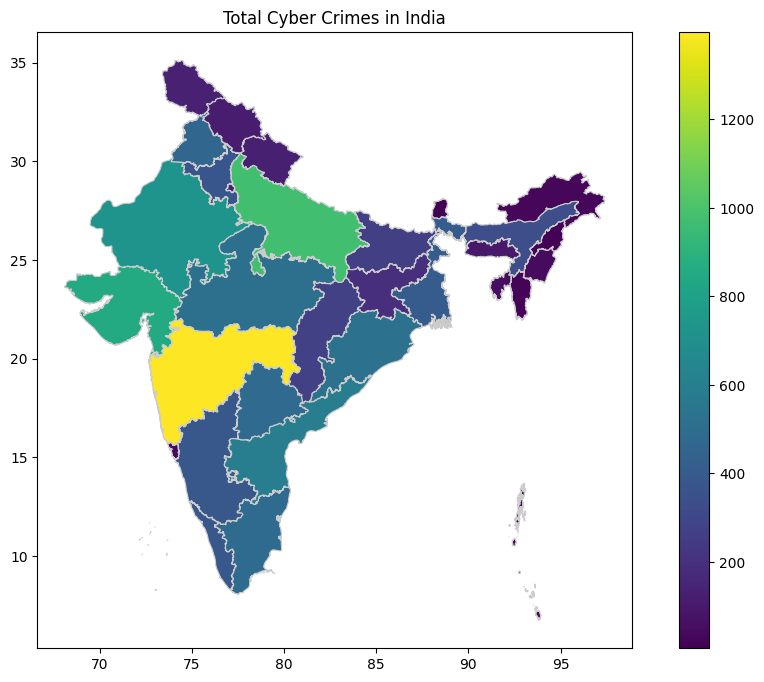

In [ ]:
new_df['Total_Crime'] = new_df[new_df.columns[6:]].sum(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(12,8))
new_df.plot(column= 'Total_Crime', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Total Cyber Crimes in India')
plt.show()

In [ ]:
df

,Year,State,District,Tampering computer source documents,Computer Related Offences,Publication/ transmission of obscenes,IT act,Cyber Stalking/ Bullying of Women/ Children,Data theft,Fraud,Cheating,Forgery,Fake Profile,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Other SLL Crimes
0,2018,Andhra Pradesh,Anantapur,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2018,Andhra Pradesh,Chittoor,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2018,Andhra Pradesh,East Godavari,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,2022,Ladakh,Kargil,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4467,2022,Ladakh,Leh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4468,2022,Lakshadweep,Lakshadweep,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4469,2022,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
colm =df.columns.tolist()
len(colm)

17

In [ ]:
df

,Year,State,District,Tampering computer source documents,Computer Related Offences,Publication/ transmission of obscenes,IT act,Cyber Stalking/ Bullying of Women/ Children,Data theft,Fraud,Cheating,Forgery,Fake Profile,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Other SLL Crimes
0,2018,Andhra Pradesh,Anantapur,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2018,Andhra Pradesh,Chittoor,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2018,Andhra Pradesh,East Godavari,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,2022,Ladakh,Kargil,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4467,2022,Ladakh,Leh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4468,2022,Lakshadweep,Lakshadweep,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4469,2022,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['Status'] = 0

<ipython-input-33-bb10d5aa9c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = 0


In [ ]:
new_df = df[df['Year'].isin([2018,2019,2020])]

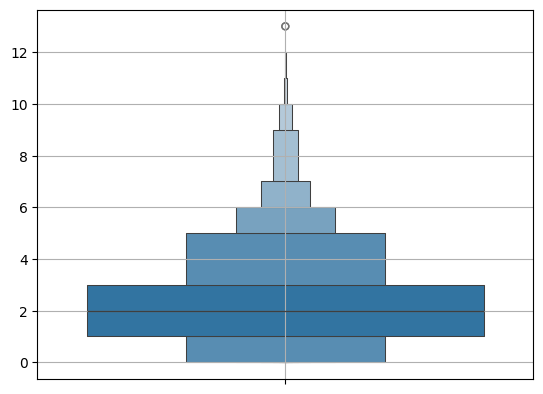

In [ ]:
sns.boxenplot(df.iloc[:,3:-1].sum(axis=1))
plt.grid()


In [ ]:
val = df.iloc[:,3:-1].sum(axis=1)
val.min(),val.max()

(0.0, 13.0)

In [ ]:
print([val])

[0       7.0
1       4.0
2       4.0
3       6.0
4       0.0
       ... 
4466    1.0
4467    0.0
4468    1.0
4469    0.0
4470    2.0
Length: 4471, dtype: float64]


In [ ]:
val = df.iloc[:,3:-1].sum(axis=1)
val.min(),val.max()
bins = [val.min()-1,2,4,6,8,val.max()+1]
labels = ['Highly Safe','Safe','Neutral','Unsafe','Highly Unsafe']
ctgrs = pd.cut(val, bins, labels=labels)
ctgrs.isnull().sum()
df['Status'] =ctgrs

0

In [ ]:
df['Status'] =ctgrs

<ipython-input-47-ca8f06c07c07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] =ctgrs


In [ ]:
df['Status']

0            Unsafe
1              Safe
2              Safe
3           Neutral
4       Highly Safe
           ...     
4466    Highly Safe
4467    Highly Safe
4468    Highly Safe
4469    Highly Safe
4470    Highly Safe
Name: Status, Length: 4471, dtype: category
Categories (5, object): ['Highly Safe' < 'Safe' < 'Neutral' < 'Unsafe' < 'Highly Unsafe']

In [ ]:
stat_dic = {'Highly Safe':-2,'Safe':-1,'Neutral':0,'Unsafe':1,'Highly Unsafe':2}
df['Status1'] = df['Status'].map(stat_dic)
df

In [ ]:
df['Status1'] = df['Status'].map(stat_dic)

<ipython-input-52-dcb2af4ac5a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status1'] = df['Status'].map(stat_dic)


In [ ]:
df

,Year,State,District,Tampering computer source documents,Computer Related Offences,Publication/ transmission of obscenes,IT act,Cyber Stalking/ Bullying of Women/ Children,Data theft,Fraud,Cheating,Forgery,Fake Profile,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Other SLL Crimes,Status,Status1
0,2018,Andhra Pradesh,Anantapur,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,Unsafe,1
1,2018,Andhra Pradesh,Chittoor,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Safe,-1
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Safe,-1
3,2018,Andhra Pradesh,East Godavari,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Neutral,0
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Highly Safe,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,2022,Ladakh,Kargil,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Highly Safe,-2
4467,2022,Ladakh,Leh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Highly Safe,-2
4468,2022,Lakshadweep,Lakshadweep,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Highly Safe,-2
4469,2022,Puducherry,Karaikal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Highly Safe,-2


In [ ]:
X = new_df.iloc[:, :-1].values
Y = new_df.iloc[:, -1].values
X,Y

(array([[2018, 'Andhra Pradesh', 'Anantapur', ..., 0.0, 1.0, 0.0],
        [2018, 'Andhra Pradesh', 'Chittoor', ..., 0.0, 1.0, 0.0],
        [2018, 'Andhra Pradesh', 'Cuddapah', ..., 0.0, 0.0, 0.0],
        ...,
        [2020, 'Lakshadweep', 'Lakshadweep', ..., 0.0, 1.0, 0.0],
        [2020, 'Puducherry', 'All Districts', ..., 0.0, 0.0, 0.0],
        [2020, 'Puducherry', 'Karaikal', ..., 0.0, 0.0, 0.0]], dtype=object),
 ['Unsafe', 'Safe', 'Safe', 'Neutral', 'Highly Safe', ..., 'Highly Safe', 'Highly Safe', 'Highly Safe', 'Highly Safe', 'Highly Safe']
 Length: 2629
 Categories (5, object): ['Highly Safe' < 'Safe' < 'Neutral' < 'Unsafe' < 'Highly Unsafe'])

In [ ]:
df.head()

,Year,State,District,Tampering computer source documents,Computer Related Offences,Publication/ transmission of obscenes,IT act,Cyber Stalking/ Bullying of Women/ Children,Data theft,Fraud,Cheating,Forgery,Fake Profile,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Other SLL Crimes,Status,Status1
0,2018,Andhra Pradesh,Anantapur,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,Unsafe,1
1,2018,Andhra Pradesh,Chittoor,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Safe,-1
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Safe,-1
3,2018,Andhra Pradesh,East Godavari,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Neutral,0
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Highly Safe,-2


In [ ]:
df.columns

Index(['Year', 'State', 'District', 'Tampering computer source documents',
       'Computer Related Offences', 'Publication/ transmission of obscenes',
       'IT act', 'Cyber Stalking/ Bullying of Women/ Children', 'Data theft',
       'Fraud', 'Cheating', 'Forgery', 'Fake Profile',
       'Cyber Blackmailing/Threatening', 'Fake News on Social Media',
       'Offences under IPC', 'Other SLL Crimes', 'Status', 'Status1'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['State_label']=label_encoder.fit_transform(df['State'])
df['District_label']=label_encoder.fit_transform(df['District'])

<ipython-input-57-b7586ad21ef7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State_label']=label_encoder.fit_transform(df['State'])
<ipython-input-57-b7586ad21ef7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District_label']=label_encoder.fit_transform(df['District'])


In [ ]:
df.head()

,Year,State,District,Tampering computer source documents,Computer Related Offences,Publication/ transmission of obscenes,IT act,Cyber Stalking/ Bullying of Women/ Children,Data theft,Fraud,...,Forgery,Fake Profile,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Other SLL Crimes,Status,Status1,State_label,District_label
0,2018,Andhra Pradesh,Anantapur,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,Unsafe,1,1,27
1,2018,Andhra Pradesh,Chittoor,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Safe,-1,1,177
2,2018,Andhra Pradesh,Cuddapah,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,Safe,-1,1,188
3,2018,Andhra Pradesh,East Godavari,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Neutral,0,1,257
4,2018,Andhra Pradesh,Guntakal Railway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Highly Safe,-2,1,310


In [ ]:
Features=['Year', 'State_label', 'District_label', 'Tampering computer source documents',
       'Computer Related Offences', 'Publication/ transmission of obscenes',
       'IT act', 'Cyber Stalking/ Bullying of Women/ Children', 'Data theft',
       'Fraud', 'Cheating', 'Forgery', 'Fake Profile',
       'Cyber Blackmailing/Threatening', 'Fake News on Social Media',
       'Offences under IPC', 'Other SLL Crimes']
target='Status1'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[Features], df[target], test_size=0.2, random_state = 0)

In [ ]:
X_train.head()

,Year,State_label,District_label,Tampering computer source documents,Computer Related Offences,Publication/ transmission of obscenes,IT act,Cyber Stalking/ Bullying of Women/ Children,Data theft,Fraud,Cheating,Forgery,Fake Profile,Cyber Blackmailing/Threatening,Fake News on Social Media,Offences under IPC,Other SLL Crimes
4257,2022,35,578,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4414,2022,10,633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521,2018,29,457,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,2020,29,473,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3581,2022,2,842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
a=LR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,a)

0.6424581005586593

In [ ]:
a

array([-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
b = classifier_nb.predict(X_test)
b

array([-2, -1, -2,  0, -2, -2, -2, -2,  2, -2, -2,  0, -2,  1, -2, -2, -2,
       -2, -1, -1, -2, -2,  0, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -2, -2, -2, -1,  2,  0, -2,
       -1, -1,  0, -2, -2, -2, -2, -1, -1, -2, -1, -2, -2, -2, -2, -1, -2,
        0, -2, -2, -1, -1, -2, -2, -2, -1, -1,  0, -1, -2, -2, -2, -2,  0,
        2, -2, -2, -1, -1, -2, -2, -2, -2, -1, -2, -2, -2, -2, -2, -2, -2,
       -1, -1,  0, -1, -2, -2, -2, -2, -1, -2, -2, -1, -1, -2, -2, -1, -2,
       -1, -2, -2, -2,  0, -2, -2, -2, -2, -1, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2,  0, -2,  0, -2, -2, -2, -2, -2, -2, -2,  0, -1, -2,
       -1, -2, -1, -2, -2,  0, -1,  0, -2, -1,  0, -1,  0,  0, -2, -2,  2,
       -1, -2, -2, -2, -2, -2, -2, -2, -1, -1, -2,  1, -1, -2,  2, -2, -2,
       -1,  0, -2, -2, -2, -2, -1, -2, -1, -1,  0, -2, -2, -2, -2, -1, -2,
       -2,  2, -2, -2, -1, -1, -2, -2,  0, -1, -2, -2, -2, -2, -2, -2,  1,
       -2, -2, -2,  2, -2

In [ ]:
accuracy_score(y_test,b)

0.8011173184357542

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='linear', random_state=0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
c = classifier_svm.predict(X_test)

c

array([-2, -1, -2, -1, -2, -2, -2, -2,  1, -1, -2,  0, -2,  1, -1, -2, -2,
       -2, -1, -2, -2, -2,  0, -2, -2, -1, -2, -2, -2, -2, -1, -1, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2,  0,  0, -1, -2, -2,  0,  1, -1, -2,
       -1, -2, -1, -1, -2, -2, -2, -2, -1, -2, -1, -2, -2, -2, -2, -1, -2,
       -1, -2, -2,  0, -1, -2, -2, -2, -2, -1,  0, -2, -2, -2, -2, -2, -1,
        2, -2, -2, -1, -2, -2, -2, -2, -2,  0, -2, -2, -2, -2, -2, -2, -2,
        0, -1, -1,  0, -2, -2, -2, -2, -1, -2, -2,  0, -1, -2, -2,  0, -2,
       -1, -2, -2, -2, -2, -2, -2, -2, -2,  0, -2, -2, -1, -2, -2, -2, -2,
       -2, -2, -2, -2,  0, -2,  0, -1, -2, -1, -2, -2, -2, -2, -1, -1, -2,
       -1, -2, -1, -2, -2,  0, -1,  0, -2, -1,  0,  0,  0, -1, -2, -1,  1,
       -1, -2, -2, -2, -2, -2, -2, -2, -1,  0, -2,  1, -2, -2,  2, -2, -2,
       -1,  0, -2, -1, -2, -2, -2, -2, -1, -2, -2, -2, -2, -2, -2, -1, -2,
       -2,  1, -2, -2, -1, -1, -1, -2,  1, -1, -2, -2, -2, -2, -2, -2,  1,
       -2, -2, -2,  2, -2

In [ ]:
accuracy_score(y_test,c)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, c)
print(cm)
accuracy_score(y_test, c)

[[575   0   0   0   0]
 [  0 199   0   0   0]
 [  0   0  76   0   0]
 [  0   0   0  30   0]
 [  0   0   0   0  15]]


1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
d = classifier_knn.predict(X_test)
accuracy_score(y_test, d)
print(d)

[-2 -1 -2 -2 -2 -1 -2 -2  0 -1 -2 -2 -2 -2 -2 -2 -1 -2 -2 -2 -2 -2  1 -2
 -2 -2 -2 -2 -2 -2 -1 -2 -2 -2 -2 -1 -2 -2 -2 -2 -2 -2 -1 -2 -2 -2 -2 -1
  1 -2 -2 -2 -1 -1 -2 -2 -2 -2 -2  0 -1 -2 -2 -2 -2  0 -1 -2 -2 -2 -2  1
 -2 -2 -2 -2 -2 -1 -1 -2 -1 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2
 -2 -2 -2 -2 -2 -1 -1 -1 -2 -1 -2 -2 -2 -2 -1 -1 -2 -1 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -1 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  1 -2 -2 -2 -2 -2 -2 -2 -2 -1  0  0  0 -2
 -1  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -1 -2 -2 -1 -2 -2 -2 -1 -2 -1 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  2 -2 -2 -2 -2 -2 -2 -1 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2  1 -2  0 -2 -2 -2
 -2  2 -2 -2 -2 -2 -2 -1 -2 -2 -2 -2 -2 -2 -1 -2 -2 -1 -2 -1 -2 -2 -1 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -1 -2 -1 -2 -2  1 -2  0 -2 -2 -2 -2 -2 -2 -1
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -1 -2 -2 -2 -2  0 -2
 -1 -2 -2 -2 -2 -1 -2 -2 -1 -2 -1 -2 -2 -2 -2 -1 -1

0.6782122905027933

In [ ]:
accuracy_score(y_test, d)


0.6782122905027933